In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
rgme_500 = '/content/gdrive/MyDrive/MOASS/Annotate/gme/rgme_500.csv'


In [2]:
import pandas as pd

df_500 = pd.read_csv(file_to_annotate)
df_rest = pd.read_csv(remaning_data)

<ipython-input-2-1bcdd0702f80>:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rest = pd.read_csv(remaning_data)


In [3]:
len(df_rest)

1032736

## Dataframes content description

The df in the plots ar as follow:
* df_500 ->>> balanced sample of positive/negative/neutral by title Vader scores (500 titles)
* df_500_emo ->>> balanced sample filtered on the valance title Vader scores, neutral are excluded (500 titles)

* df_rest ->>>> remaining sample, unbiased (close to the actual) data distribution

* df_rest_emo ->>>>  remaining sample, unbiased (close to the actual) data distribution filtered on the valance title Vader scores, neutral are excluded

## Total emoji counts per DataFrame

Plots are not making difference between positive and negative emotions but are diplayed by DataFrame = all emotions (df_500, df_rest) or with emotional valence load - pos/neg (df_500_emo, df_rest_emo). You can choce the columns thaty you are wokrking with (title, comments, clean_text = title without stopwords), onve yop set it all the plots are displayed for teh same.

In [7]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 10.5 MB/s eta 0:00:00


In [4]:
import pandas as pd
import emoji
from collections import Counter
import plotly.express as px

# Column in the DataFrame
col = 'title' # 'title', 'clean_text', 'commmnets'

# Function to extract emojis using the emoji module
def extract_emojis(text):
    return [e['emoji'] for e in emoji.emoji_list(text)]

def extract_emojis(text):
    # Extract emojis from text using emoji.emoji_list
    return ','.join([e['emoji'] for e in emoji.emoji_list(text)])
# Apply emoji extraction to each DataFrame
df_500['emojis'] = df_500[col].apply(extract_emojis)
# df_rest['emojis'] = df_rest[col].apply(extract_emojis)

df_500['emojis'] = df_500['emojis'].apply(lambda x: x.split(',') if x else [])
# df_rest['emojis'] = df_rest['emojis'].apply(lambda x: x.split(',') if x else [])

# Flatten the emojis into one list per DataFrame
all_emojis_500 = sum(df_500['emojis'], [])
# all_emojis_rest = sum(df_rest['emojis'], [])

# Get emoji counts using Counter
emoji_counts_500 = Counter(all_emojis_500)
# emoji_counts_rest = Counter(all_emojis_rest)

# Function to plot emoji counts using Plotly
def plot_emoji_counts(emoji_counts, title):
    # Extract emoji data for plotting
    emojis, counts = zip(*emoji_counts.most_common(10))

    # Create a DataFrame for Plotly
    df_plot = pd.DataFrame({'Emoji': emojis, 'Count': counts})

    # Plot using Plotly Express
    fig = px.bar(df_plot, x='Emoji', y='Count', title=f"Top Emojis in {title}",
                 labels={'Emoji': 'Emojis', 'Count': 'Count'},
                 color='Count', color_continuous_scale='Viridis')

    fig.update_layout(xaxis=dict(tickmode='array', tickvals=emojis))  # Ensure emojis are visible
    fig.show()

# Plot bar charts for each DataFrame
plot_emoji_counts(emoji_counts_500, 'df_500')
# plot_emoji_counts(emoji_counts_rest, 'df_rest')

# Optional: Print out counts for verification
print("Emoji counts df_500:", emoji_counts_500)
print("\nEmoji counts df_rest:", emoji_counts_rest)

Emoji counts df_500: Counter({'🚀': 77, '💎': 47, '🦍': 39, '🙌': 19, '👐': 11, '🎶': 6, '🦧': 6, '🚨': 6, '🌕': 4, '🔥': 4, '🙌🏼': 4, '🙌🏻': 3, '🖖': 3, '👈🏻': 3, '🇮🇪': 3, '🖐': 2, '👀': 2, '😂': 2, '😀': 1, '🤲': 1, '🇳🇿': 1, '🤣': 1, '😒': 1, '💪': 1, '✌🏼': 1, '😤': 1, '😻': 1, '🌙': 1, '🌟': 1, '🤔': 1, '👏': 1})


NameError: name 'emoji_counts_rest' is not defined

In [7]:
df_title_emoji_500 = df_500[df_500['title'].apply(lambda x: any(e['emoji'] for e in emoji.emoji_list(x)))]
# df_title_emoji_rest = df_rest[df_rest['title'].apply(lambda x: isinstance(x, str) and any(e['emoji'] for e in emoji.emoji_list(x)))]

df_title_emoji_500.to_csv('/content/gdrive/MyDrive/MOASS/gme_titles_only.csv', index=False)
# df_title_emoji_rest.to_csv('/content/gdrive/MyDrive/MOASS/gme_titles_only_rest.csv', index=False)

In [32]:
df_t0_save = df_500 [['id', 'title',
       'url', 'score', 'author', 'num_comments', 'date', 'flair', 'compound',
       'neg', 'neu', 'pos', 'spacy_title', 'clean_text', 'char_count',
       'word_count', 'emojis']]

KeyError: "['emojis'] not in index"

In [22]:
df_title_emoji_save .shape

(69, 17)

In [23]:
df_title_emoji_save .iloc[3][['title', 'emojis']]

,8
title,The more and more they don’t let this thing po...
emojis,"[🚀, 🌙, 🚀, 🚀, 🚀]"


## Emotional valence in a DataFrame
To be used with df_500 and df_rest, as it produces output fopr all emotions (pos/neg/neutral)
There are four plots displayed, for full DataFrame, and for each emotion type. Switching between the DataFrama may help in verifying if balanced sampling (500 only) has impat on emojis distributions.  

In [24]:
import pandas as pd
import emoji
from collections import Counter
import plotly.express as px

# Function to extract emojis using the emoji module
def extract_emojis(text):
    return [e['emoji'] for e in emoji.emoji_list(text)]

# Function to generate plots based on 'type' column
def plot_emoji_counts_by_type(df, col, type_col, type_value=None):
    # If no type value is passed (None), show for both types (0 and 1 combined)
    if type_value is None:
        title = "All Types"
        emoji_counts = get_emoji_counts_by_type(df, col, type_col, None)
    elif type_value == 'nan':
        title = "Type NaN"
        emoji_counts = get_emoji_counts_by_type(df, col, type_col, 'nan')
    else:
        # Show plot for the selected type (0 or 1)
        title = f"Type {type_value}"
        emoji_counts = get_emoji_counts_by_type(df, col, type_col, type_value)

    # Plot the emoji counts
    plot_emoji_counts(emoji_counts, title)

# Helper function to extract emoji counts from a filtered DataFrame based on type
def get_emoji_counts_by_type(df, col, type_col, type_value):
    if type_value is None:
        # No filtering, use the whole DataFrame
        filtered_df = df
    elif type_value == 'nan':
        # Filter for rows where the type is NaN
        filtered_df = df[df[type_col].isna()]
    else:
        # Filter the DataFrame based on the 'type' column (0 or 1)
        filtered_df = df[df[type_col] == type_value]

    # Apply emoji extraction to the filtered DataFrame
    filtered_df['emojis'] = filtered_df[col].apply(extract_emojis)

    # Flatten all emojis in the filtered DataFrame
    all_emojis_filtered = sum(filtered_df['emojis'], [])

    # Get emoji counts using Counter
    emoji_counts_filtered = Counter(all_emojis_filtered)

    return emoji_counts_filtered

# Function to plot emoji counts using Plotly
def plot_emoji_counts(emoji_counts, title):
    # Extract emoji data for plotting
    try:
      emojis, counts = zip(*emoji_counts.most_common(10))
    except ValueError:
      emojis, counts = zip(*emoji_counts.most_common())
    # Create a DataFrame for Plotly
    df_plot = pd.DataFrame({'Emoji': emojis, 'Count': counts})

    # Plot using Plotly Express
    fig = px.bar(df_plot, x='Emoji', y='Count', title=f"Top Emojis in {title}",
                 labels={'Emoji': 'Emojis', 'Count': 'Count'},
                 color='Count', color_continuous_scale='Viridis')

    fig.update_layout(xaxis=dict(tickmode='array', tickvals=emojis))  # Ensure emojis are visible
    fig.show()

# Example usage:
# Default behavior (All types: both 0 and 1 combined)
plot_emoji_counts_by_type(df_500, 'title', 'sentiment_nominal')

# For Type 0
plot_emoji_counts_by_type(df_500, 'title', 'sentiment_nominal', 'Negative')

# For Type 1
plot_emoji_counts_by_type(df_500, 'title', 'sentiment_nominal', 'Positive')

# For NaN values (where sentiment is between -0.05 and 0.05)
plot_emoji_counts_by_type(df_500, 'title', 'sentiment_nominal', 'Neutral')


KeyError: 'sentiment_nominal'

In [ ]:
!pip install vaderSentiment emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 19.1 MB/s eta 0:00:00


## Emoji Vader Scores

In emoji conuter pick the counter you are using for plotting. They are using the same names as DataFrames. Then, when you run the plotting code in the middle line you are getting emojis that do not have currently a Vader scores. In the original paper author were assigning scores manually to emojis that are relevant for the reddits, you can find details in the dataset paper. Full list of emojis and scores is displayed under the plot.     

In [ ]:
emoji_counter = emoji_counts_500 # emoji_counts_500_emo, emoji_counts_rest, emoji_counts_rest_emo

NameError: name 'emoji_counts_500' is not defined

In [ ]:
import plotly.graph_objects as go
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter


# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get VADER scores for each emoji (using the compound score as an example)
def get_vader_score(emoji):
    sentiment = analyzer.polarity_scores(emoji)
    return sentiment['compound'] if sentiment['compound'] != 0 else None  # None for unknown emojis

# Apply VADER sentiment analysis to each emoji in the counter
emoji_vader_scores = {emoji: get_vader_score(emoji) for emoji in emoji_counter}

# Separate emojis into two groups: those with valid VADER scores and those without
valid_emojis = {emoji: score for emoji, score in emoji_vader_scores.items() if score is not None}
invalid_emojis = [emoji for emoji, score in emoji_vader_scores.items() if score is None]

# Prepare data for plotting
sorted_valid_emoji_scores = sorted(valid_emojis.items(), key=lambda x: x[1])  # Sort by compound score
valid_emojis, valid_scores = zip(*sorted_valid_emoji_scores)  # Unpack into separate lists

# Create the plot using Plotly
fig = go.Figure()

# Scatter plot of valid emojis, using compound scores as x-axis and constant y-axis
fig.add_trace(go.Scatter(
    x=valid_scores,
    y=[0]*len(valid_scores),  # All emojis will be aligned along the y=0 line
    mode='markers+text',  # Show both markers and text (emoji labels)
    marker=dict(size=30, color='blue', symbol='circle'),
    text=valid_emojis,  # Emoji labels
    textposition='top center',  # Position of text (emoji)
    textfont=dict(size=20),
))

# Scatter plot of invalid emojis (those not processed by VADER)
if invalid_emojis:
    y_offset = 0.1  # Start offset for the invalid emojis
    for idx, emoji in enumerate(invalid_emojis):
        fig.add_trace(go.Scatter(
            x=[0],  # All invalid emojis will be aligned at x=0
            y=[y_offset + idx * 0.1],  # Increment y offset for each emoji
            mode='markers+text',
            marker=dict(size=30, color='red', symbol='x'),
            text=[emoji],
            textposition='bottom center',
            textfont=dict(size=20),
            name="Not Processed by VADER" if idx == 0 else "",  # Only add name for the first invalid emoji
        ))

# Add a vertical line at x=0 (to represent neutral sentiment)
fig.add_trace(go.Scatter(
    x=[0, 0],
    y=[-0.1, 0.1],
    mode='lines',
    line=dict(color='black', dash='dash'),
    name='Neutral (0)',
))

# Update layout properties
fig.update_layout(
    title="Sentiment Analysis of Emojis (VADER Compound Score)",
    xaxis_title="Compound Sentiment Score",
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),  # Remove y-axis labels and grid
    xaxis=dict(range=[min(valid_scores)-0.1, max(valid_scores)+0.1]),  # Adjust x-axis range to fit all emojis
    plot_bgcolor="white",
    showlegend=True,  # Show the legend for the invalid emojis
)

# Show the plot
fig.show()

# Create a list with the emojis and their sentiment scores (valid and invalid)
emoji_sentiment_list = []

# Add valid emojis and their scores
for emoji, score in zip(valid_emojis, valid_scores):
    emoji_sentiment_list.append((emoji, score, 'Valid'))

# Add invalid emojis (with None as the score)
for emoji in invalid_emojis:
    emoji_sentiment_list.append((emoji, None, 'Invalid'))

# Return the list of emojis with their sentiment information
emoji_sentiment_list

[('😱', -0.7003, 'Valid'),
 ('😢', -0.4767, 'Valid'),
 ('😭', -0.4767, 'Valid'),
 ('💥', -0.3612, 'Valid'),
 ('🔥', -0.34, 'Valid'),
 ('💤', -0.296, 'Valid'),
 ('🛑', -0.296, 'Valid'),
 ('🤓', -0.296, 'Valid'),
 ('😩', -0.2732, 'Valid'),
 ('💫', -0.2263, 'Valid'),
 ('😔', 0.0772, 'Valid'),
 ('✨', 0.3182, 'Valid'),
 ('😅', 0.3612, 'Valid'),
 ('😆', 0.3612, 'Valid'),
 ('😀', 0.3612, 'Valid'),
 ('🥳', 0.3818, 'Valid'),
 ('😌', 0.3818, 'Valid'),
 ('🎉', 0.4019, 'Valid'),
 ('🙂', 0.4033, 'Valid'),
 ('🤗', 0.4215, 'Valid'),
 ('😂', 0.4404, 'Valid'),
 ('😇', 0.4588, 'Valid'),
 ('😁', 0.4588, 'Valid'),
 ('😎', 0.4588, 'Valid'),
 ('😍', 0.4588, 'Valid'),
 ('😈', 0.4588, 'Valid'),
 ('😻', 0.4588, 'Valid'),
 ('🥇', 0.4767, 'Valid'),
 ('🏅', 0.4767, 'Valid'),
 ('🤙🏻', 0.4939, 'Valid'),
 ('✋', 0.4939, 'Valid'),
 ('🤚', 0.4939, 'Valid'),
 ('🤣', 0.4939, 'Valid'),
 ('✌🏼', 0.4939, 'Valid'),
 ('🙋', 0.4939, 'Valid'),
 ('🤙🏼', 0.4939, 'Valid'),
 ('🤭', 0.4939, 'Valid'),
 ('♥️', 0.6369, 'Valid'),
 ('❤', 0.6369, 'Valid'),
 ('💜', 0.6369, '

## Vader Emoji Scores Overview

You can check the scores for emojis assigned in Vader.

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import emoji

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Extract all emoji characters from emoji.EMOJI_DATA
all_emojis = list(emoji.EMOJI_DATA.keys())

# Get polarity scores for each emoji
emoji_scores = {
    e: analyzer.polarity_scores(e)
    for e in all_emojis
}

# Optionally filter to only emojis with non-zero compound score
nonzero_emoji_scores = {
    e: scores for e, scores in emoji_scores.items()
    if scores['compound'] != 0.0
}

# Print top 20 by absolute compound score
for emoji_char, scores in sorted(nonzero_emoji_scores.items(), key=lambda x: -abs(x[1]['compound'])):
    print(f"{emoji_char}: {scores}")


🥰: {'neg': 0.0, 'neu': 0.291, 'pos': 0.709, 'compound': 0.8074}
😙: {'neg': 0.0, 'neu': 0.309, 'pos': 0.691, 'compound': 0.7717}
💖: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.7506}
👌: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.7297}
👌🏿: {'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.7297}
👌🏻: {'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.7297}
👌🏾: {'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.7297}
👌🏼: {'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.7297}
👌🏽: {'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.7297}
😊: {'neg': 0.0, 'neu': 0.333, 'pos': 0.667, 'compound': 0.7184}
💗: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.7096}
😱: {'neg': 0.744, 'neu': 0.256, 'pos': 0.0, 'compound': -0.7003}
😸: {'neg': 0.0, 'neu': 0.421, 'pos': 0.579, 'compound': 0.6705}
😄: {'neg': 0.0, 'neu': 0.353, 'pos': 0.647, 'compound': 0.6705}
♋: {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.6597}
💞: {'neg': 0.0, 'neu': 0.189, 'pos': 0.811, 'comp

In [16]:
import emoji

df_title_emoji_500 = df_500[df_500['title'].apply(lambda x: any(e['emoji'] for e in emoji.emoji_list(x)))]
df_title_emoji_rest = df_rest[df_rest['title'].apply(lambda x: any(e['emoji'] for e in emoji.emoji_list(x)))]

TypeError: object of type 'float' has no len()

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
# Initialize the binarize
mlb = MultiLabelBinarizer()
train_data = df_title_emoji_500
test_data = df_title_emoji_rest

Multilabel Binaizer (Multi One-Hot)

In [ ]:
# Fit and transform the emoji lists
emoji_binary_train = mlb.fit_transform(train_data['emojis'])

# Create a DataFrame with the binary data
emoji_df_train = pd.DataFrame(emoji_binary_train, columns=mlb.classes_)


In [ ]:
# Fit and transform the emoji lists
emoji_binary_test = mlb.transform(test_data['emojis'])

# Create a DataFrame with the binary data
emoji_df_test = pd.DataFrame(emoji_binary_test, columns=mlb.classes_)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:909: UserWarning:

unknown class(es) ['‼️', '⏰', '☀', '⚾', '✊', '✊🏾', '✋', '✝', '❌', '❗', '❤️', '➡️', '⬇', '〽', '🇦🇺', '🇨🇦', '🇮🇹', '🇳🇱', '🇳🇿', '🇺🇸', '🌈', '🌌', '🌎', '🌕', '🌘', '🌚', '🍁', '🍆', '🍦', '🍿', '🎢', '🎥', '🎬', '🎶', '🏊🏽', '🏙', '🐈', '🐒', '🐸', '🐻', '👀', '👇', '👈', '👉', '👉🏼', '👊', '👌', '👍', '👍🏽', '👏', '👨\u200d💻', '👨\u200d🚀', '👩\u200d🚀', '💋', '💕', '💙', '💩', '💪🏼', '💰', '💺', '📉', '📞', '📣', '📷', '🔴', '🕷', '🖥️', '🗑️', '🗽', '😅', '😆', '😇', '😉', '😍', '😟', '😬', '😳', '😸', '🙃', '🙊', '🙋\u200d♂️', '🙋🏻\u200d♂️', '🙋🏼\u200d♂️', '🙌🏼', '🙌🏽', '🙏', '🚿', '🛑', '🤑', '🤓', '🤔', '🤚', '🤞🏽', '🤡', '🤣', '🤯', '🤲', '🤳', '🥢', '🥲', '🧐', '🧘\u200d♀️', '🧠', '🪐'] will be ignored



BernoulliNB with nominal target (Positive/Negative/Neutral) with
Multi One-Hot

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report

# Define features and target
X = emoji_binary_test # Features: binary emoji columns
y = test_data['sentiment_nominal']  # Your target variable

X_test = emoji_binary_train  # Features: binary emoji columns
y_test = train_data['sentiment_nominal']  # Your target variable

# Initialize and train the model
model = BernoulliNB()
model.fit(X, y)
y_pred = model.predict(X_test)
clf_rep = classification_report(y_test, y_pred)
print(clf_rep)

              precision    recall  f1-score   support

    Negative       0.88      1.00      0.93         7
     Neutral       0.75      0.75      0.75         4
    Positive       0.94      0.88      0.91        17

    accuracy                           0.89        28
   macro avg       0.85      0.88      0.86        28
weighted avg       0.90      0.89      0.89        28



BernoulliNB Features Importance

In [ ]:
import numpy as np
import pandas as pd

# Get emoji names from MultiLabelBinarizer
feature_names = mlb.classes_

# Log-probabilities of P(feature | class)
log_probs = model.feature_log_prob_  # shape: (n_classes, n_features)

# Class labels in the order used internally
classes = model.classes_


for i, class_label in enumerate(classes):
    top_indices = np.argsort(log_probs[i])[::-1][:10]  # indices of top 10 features
    top_features = [(feature_names[j], log_probs[i][j]) for j in top_indices]

    print(f"\nTop emojis for class '{class_label}' (log-probabilities):")
    for emoji, log_prob in top_features:
        print(f"{emoji}: {log_prob:.4f}")


Top emojis for class 'Negative' (log-probabilities):
🔥: -1.0986
🚨: -2.1972
💥: -2.4849
🤦‍♂️: -2.4849
🍌: -2.4849
💎: -2.4849
☝🏼: -2.8904
🦧: -2.8904
🖕🏼: -2.8904
🙌: -2.8904

Top emojis for class 'Neutral' (log-probabilities):
💎: -1.9253
🙌: -2.2618
🚨: -2.7726
🟣: -2.7726
♾: -2.7726
🧨: -3.1781
📈: -3.1781
🚀: -3.1781
🥳: -3.8712
🦧: -3.8712

Top emojis for class 'Positive' (log-probabilities):
🚀: -0.8300
🦍: -1.4339
💎: -1.5366
🙌: -2.2571
💪: -2.7496
🤝: -3.2016
♾: -3.2016
👐: -3.3557
😂: -3.3557
🔥: -3.5381


In [ ]:
len(set([y for x in train_data['emojis'] for y in x]))

38

BayesianRidge on Vader score targets with Multi One-Hot

In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

# Define features and target
X = emoji_binary_train # Features: binary emoji columns
y = train_data['compound']  # Your target variable

X_test = emoji_binary_test  # Features: binary emoji columns
y_test = test_data['compound']  # Your target variable

# Initialize and train the model
model =  BayesianRidge()
model.fit(X, y)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


Mean Squared Error: 0.1380


BayesianRiedge Features Importance

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error

# Assuming you have:
# - model.fit(X, y)
# - emoji_binary_test → X_test
# - test_data['compound'] → y_test
# - test_data['sentiment_nominal'] → sentiment labels
# - mlb.classes_ → emoji feature names

feature_names = mlb.classes_
sentiments = test_data['sentiment_nominal'].unique().astype(str)

for sentiment in sentiments:
    mask = test_data['sentiment_nominal'] == sentiment

    y_true_filtered = y_test[mask]
    y_pred_filtered = y_pred[mask]

    mse = mean_squared_error(y_true_filtered, y_pred_filtered)
    print(f"\nMSE for sentiment '{sentiment}': {mse:.4f}")

    # Get subset of test matrix for that sentiment
    X_sentiment = X_test[mask]

    # Compute mean contribution of each feature across samples
    avg_contrib = np.mean(X_sentiment.toarray() * model.coef_, axis=0)

    # Get top 10 emoji features by absolute contribution
    top_indices = np.argsort(np.abs(avg_contrib))[::-1][:10]
    top_features = [(feature_names[i], avg_contrib[i]) for i in top_indices]

    print(f"Top emoji feature contributions for sentiment '{sentiment}':")
    for emoji, contrib in top_features:
        print(f"{emoji}: {contrib:.4f}")



MSE for sentiment 'Positive': 0.1452
Top emoji feature contributions for sentiment 'Positive':
🚀: 0.1868
🦍: 0.0672
💎: 0.0215
🔥: -0.0141
😂: 0.0075
💥: 0.0057
🙌: 0.0034
🤦‍♂️: -0.0032
😁: 0.0025
♾: -0.0024

MSE for sentiment 'Neutral': 0.0258
Top emoji feature contributions for sentiment 'Neutral':
💎: 0.0132
🚀: 0.0093
🚨: -0.0048
🟣: -0.0032
🙌: 0.0029
♾: -0.0029
📈: -0.0016
🧨: 0.0000
🥳: 0.0000
🦧: 0.0000

MSE for sentiment 'Negative': 0.2535
Top emoji feature contributions for sentiment 'Negative':
🔥: -0.1941
🤦‍♂️: -0.0321
💥: 0.0190
🖕🏼: -0.0117
🚨: -0.0098
☝🏼: -0.0096
💎: 0.0060
🦧: -0.0026
🍌: 0.0011
🙌: 0.0010


DictVectorizer over CounterDict

In [ ]:
from sklearn.feature_extraction import DictVectorizer
from collections import Counter

In [ ]:
vec = DictVectorizer()
emoji_500_counts = df_title_emoji_500['emojis'].apply(Counter)
emoji_rest_counts = df_title_emoji_rest['emojis'].apply(Counter)
emoji_rest_vec = vec.fit_transform(emoji_rest_counts)
emoji_500_vec = vec.transform(emoji_500_counts)

In [ ]:
Vectorized Train/Test

In [ ]:
train_vec = emoji_rest_vec
test_vec = emoji_500_vec

Label Encoding for MultinominalNB

In [ ]:
from sklearn.preprocessing import LabelEncoder

y =  df_title_emoji_rest['sentiment_nominal']
y_test = df_title_emoji_500['sentiment_nominal']

le = LabelEncoder()
y_encoded = le.fit_transform(y)  # e.g., ['negative', 'neutral', 'positive'] → [0, 1, 2]
y_test_encoded = le.transform(y_test)

MultinominalNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(train_vec, y_encoded)

MultinomialNB()

In [ ]:
y_pred = clf.predict(test_vec)
clf_rep = classification_report(y_test_encoded, y_pred)
print(clf_rep)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.75      0.75      0.75         4
           2       0.94      0.88      0.91        17

    accuracy                           0.89        28
   macro avg       0.85      0.88      0.86        28
weighted avg       0.90      0.89      0.89        28



MultinominalNB Features Importances

In [ ]:
import numpy as np

# Get feature names from DictVectorizer
feature_names = vec.get_feature_names_out()

# Get log-probabilities
log_probs = clf.feature_log_prob_

# Map back to labels (e.g., 'positive', 'neutral', etc.)
classes = le.inverse_transform(np.arange(len(log_probs)))

# Show top 10 emojis per class
for i, class_label in enumerate(classes):
    top_indices = np.argsort(log_probs[i])[::-1][:10]
    top_features = [(feature_names[j], np.exp(log_probs[i][j])) for j in top_indices]
    print(f"\nTop emojis for class '{class_label}':")
    for emoji, prob in top_features:
        print(f"{emoji}: {prob:.4f}")


Top emojis for class 'Negative':
🔥: 0.1376
🚨: 0.0367
🍌: 0.0229
😟: 0.0183
🧐: 0.0183
💥: 0.0183
🛑: 0.0183
🤔: 0.0138
🙃: 0.0138
🦧: 0.0138

Top emojis for class 'Neutral':
💎: 0.0417
🚨: 0.0417
🤔: 0.0370
🙌: 0.0231
🟣: 0.0231
😳: 0.0185
🐒: 0.0185
➡️: 0.0185
🐸: 0.0139
👀: 0.0139

Top emojis for class 'Positive':
🚀: 0.3333
🦍: 0.0594
💎: 0.0567
🙌: 0.0243
💪: 0.0148
✅: 0.0148
🚨: 0.0135
👀: 0.0135
😂: 0.0108
🍌: 0.0108


BayesianRidge over DiictVectorizer

In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

# Define features and target
X = train_vec.toarray() # Features: binary emoji columns
y = df_title_emoji_rest['compound']  # Your target variable

X_test = test_vec.toarray()  # Features: binary emoji columns
y_test = df_title_emoji_500['compound']  # Your target variable

# Initialize and train the model
model =  BayesianRidge()
model.fit(X, y)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


Mean Squared Error: 0.1754


BayesianRidge Feature Importances

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error

# Assuming you have:
# - model.fit(X, y)
# - emoji_binary_test → X_test
# - test_data['compound'] → y_test
# - test_data['sentiment_nominal'] → sentiment labels
# - mlb.classes_ → emoji feature names

feature_names = vec.get_feature_names_out()
sentiments = df_title_emoji_500['sentiment_nominal'].unique().astype(str)

for sentiment in sentiments:
    mask = df_title_emoji_500['sentiment_nominal'] == sentiment

    y_true_filtered = y_test[mask]
    y_pred_filtered = y_pred[mask]

    mse = mean_squared_error(y_true_filtered, y_pred_filtered)
    print(f"\nMSE for sentiment '{sentiment}': {mse:.4f}")

    # Get subset of test matrix for that sentiment
    X_sentiment = X_test[mask]

    # Compute mean contribution of each feature across samples
    avg_contrib = np.mean(X_sentiment * model.coef_, axis=0)

    # Get top 10 emoji features by absolute contribution
    top_indices = np.argsort(np.abs(avg_contrib))[::-1][:10]
    top_features = [(feature_names[i], avg_contrib[i]) for i in top_indices]

    print(f"Top emoji feature contributions for sentiment '{sentiment}':")
    for emoji, contrib in top_features:
        print(f"{emoji}: {contrib:.4f}")



MSE for sentiment 'Positive': 0.0724
Top emoji feature contributions for sentiment 'Positive':
🦍: 0.1164
💥: -0.0290
💎: 0.0238
🚀: 0.0217
🍌: -0.0140
🔥: -0.0093
😂: 0.0081
✅: -0.0052
😁: 0.0036
😘: 0.0031

MSE for sentiment 'Negative': 0.4693
Top emoji feature contributions for sentiment 'Negative':
🔥: -0.3623
🤦‍♂️: -0.0367
🚨: -0.0166
🖕🏼: -0.0138
☝🏼: -0.0119
🦧: -0.0107
🧐: 0.0000
🦍: 0.0000
🥸: 0.0000
🪗: 0.0000

MSE for sentiment 'Neutral': 0.0984
Top emoji feature contributions for sentiment 'Neutral':
🚨: -0.0291
📈: -0.0095
♾: -0.0027
🟣: -0.0009
🪗: 0.0000
🪐: 0.0000
🦧: 0.0000
🦍: 0.0000
🥸: 0.0000
🥳: 0.0000


Emoji & Sentiment Graph

In [ ]:
df_exploded = pd.read_csv('/content/gdrive/MyDrive/MOASS/Annotate/rDDintoGME_comments_features_500_newsentiment.csv')

In [ ]:
import ast

# Function to extract emojis using the emoji module
def extract_emojis(text):
    return [e['emoji'] for e in emoji.emoji_list(text)]


nx_df = df_exploded
nx_df = nx_df.fillna('')
nx_df = nx_df[nx_df['comments'].apply(lambda x: any(e['emoji'] for e in emoji.emoji_list(x)))]
nx_df['emoji'] = nx_df['comments'].apply(lambda x: extract_emojis(x))
nx_df['emoji'] = nx_df['emoji'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
nx_df['title_emoji'] = nx_df['title'].apply(lambda x: extract_emojis(x))
nx_df['title_emoji'] = nx_df['title_emoji'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
#nx_df['title'] = nx_df['title'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
nx_df['emoji'] = nx_df['emoji'].fillna('')
nx_df['title'] = nx_df['title'].fillna('')
nx_df['title_emoji'] = nx_df['title_emoji'].fillna('')
nx_df = nx_df.dropna(subset=['comments'])

In [ ]:
!sudo apt install fonts-noto-color-emoji

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-noto-color-emoji
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.0 MB of archives.
After this operation, 11.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 fonts-noto-color-emoji all 2.047-0ubuntu0.22.04.1 [10.0 MB]
Fetched 10.0 MB in 2s (5,966 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-noto-color-e

In [ ]:
!ls /usr/share/fonts/truetype/noto/

⚙️ Algorithm Used:
The visualization uses:

➤ nx.spring_layout(G, weight='weight')
This is a force-directed layout algorithm (also known as a spring layout). Internally, it uses the Fruchterman-Reingold force-directed algorithm. It treats the graph as a physical system:

Nodes are like particles that repel each other (like charges).

Edges are like springs that pull connected nodes together (attractive force).

The algorithm iteratively adjusts node positions to minimize the system’s "energy".

The weight parameter is used as the inverse of distance: larger weights = shorter distances = stronger pull between nodes.

📊 How the Graph Is Organized:
We construct a network graph where:

Nodes represent:
Individual emoji characters found in comments.

Each emoji becomes a node with properties like:

label: the emoji

vader_score: sentiment score from the comment it came from

title: associated post title

Edges represent relationships:
An edge is added between emoji if:

They co-occur in posts/comments that share either:

The same title (title-based connection)

At least one common emoji in comments (comment-based connection)

Edge weight is based on:

The average compound sentiment score of the connected comments/posts.

This weight determines how strongly two emoji are "pulled" together in the layout.

Edge styles:
Green (solid): positive sentiment connections.

Red (dashed): negative or neutral sentiment connections.

Thicker lines: stronger sentiment magnitude (higher weight).

🧠 Summary of Workflow:
We compute similarity matrices:

One based on shared emoji (comment_matrix).

One based on shared post title (title_matrix).

We build a NetworkX graph:

Nodes = individual emojis

Edges = sentiment-weighted relationships based on those matrices

We apply a force-directed layout (spring_layout) to determine node positions.

We render the graph with:

Emoji as nodes

Sentiment-driven colored and weighted edges

Labels using emoji text (though missing glyphs in your font can cause these not to render)



## !!Need to fix emoji font!!!For reference use plotly graph after that one!

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Rebuild font cache
font_manager._rebuild()

# Try adding the font again
font_manager.fontManager.addfont('/usr/share/fonts/truetype/noto/NotoColorEmoji.ttf')

# Set the default font
plt.rcParams['font.family'] = 'Noto Color Emoji'

AttributeError: module 'matplotlib.font_manager' has no attribute '_rebuild'

<ipython-input-74-36421b8d21b2>:117: UserWarning:

Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from font(s) DejaVu Sans.

<ipython-input-74-36421b8d21b2>:117: UserWarning:

Glyph 129421 (\N{GORILLA}) missing from font(s) DejaVu Sans.

<ipython-input-74-36421b8d21b2>:117: UserWarning:

Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.

<ipython-input-74-36421b8d21b2>:117: UserWarning:

Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.

<ipython-input-74-36421b8d21b2>:117: UserWarning:

Glyph 128064 (\N{EYES}) missing from font(s) DejaVu Sans.

<ipython-input-74-36421b8d21b2>:117: UserWarning:

Glyph 128074 (\N{FISTED HAND SIGN}) missing from font(s) DejaVu Sans.

<ipython-input-74-36421b8d21b2>:117: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.

<ipython-input-74-36421b8d21b2>:117: UserWarning:

Glyph 128142 (\N{GEM STONE}) missing from font(s) DejaVu Sans.

<ipython-input-74-36421b8d21b2>:117: UserWarning:

Glyph 127769 (\N{CRESC

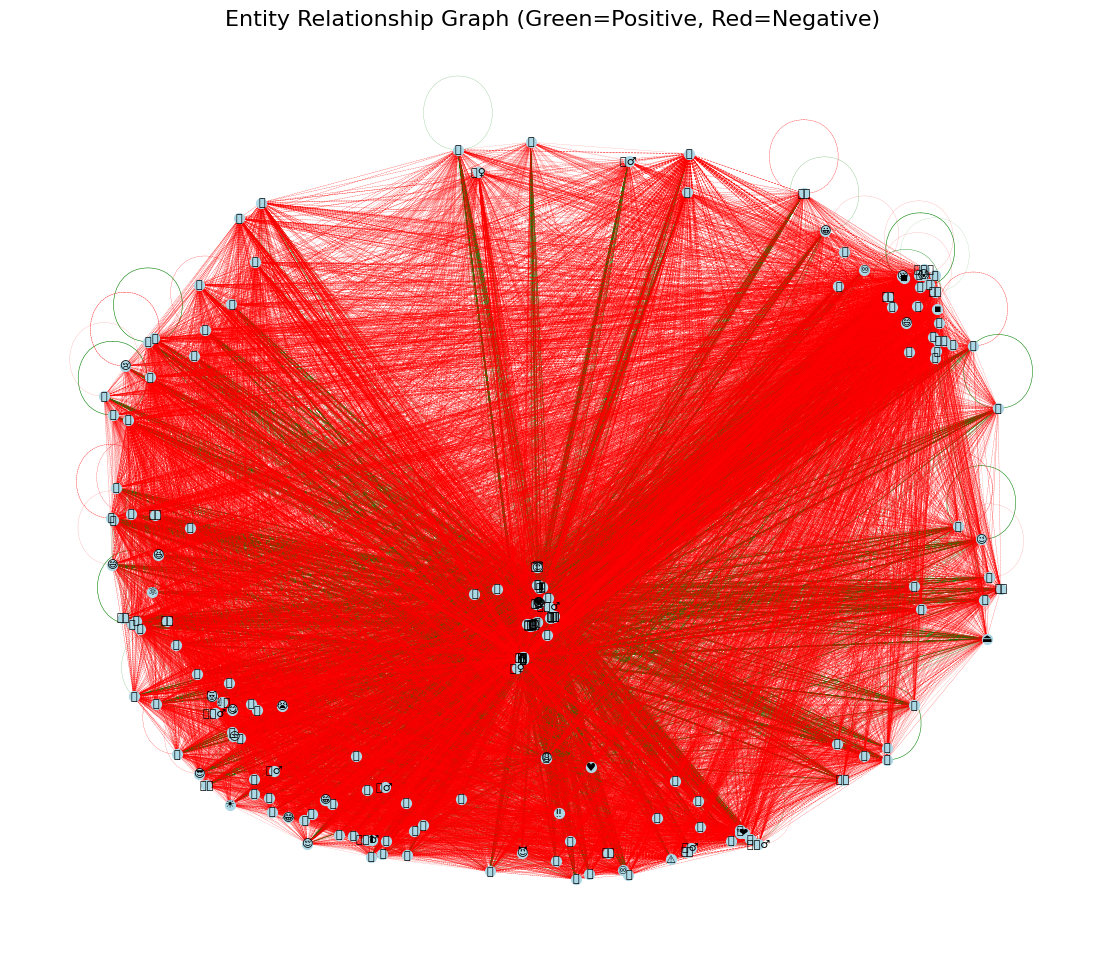

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager


# --- Assume your dataframe is loaded as ---
df = nx_df

# --- Create adjacency matrices ---
comment_matrix = np.zeros((len(df), len(df)))
title_matrix = np.zeros((len(df), len(df)))

# --- Helper functions ---
def update_matrix(matrix, df, column_name, similarity_func):
    for i in range(len(df)):
        for j in range(i + 1, len(df)):
            if similarity_func(df.iloc[i], df.iloc[j], column_name):
                matrix[i][j] = matrix[j][i] = 1  # Symmetric

def comment_similarity(row1, row2, column_name):
    return bool(set(row1['emoji']) & set(row2['emoji']))

def title_similarity(row1, row2, column_name):
    return row1['title_emoji'] == row2['title_emoji']

# --- Fill matrices ---
update_matrix(comment_matrix, df, 'emoji', comment_similarity)
update_matrix(title_matrix, df, 'title_emoji', title_similarity)

# --- Create graph ---
G = nx.Graph()

# --- Add nodes ---
for _, row in df.iterrows():
    for entity in row['emoji']:
        G.add_node(
            entity,
            label=entity,
            vader_score=row['compound_ind'],
            title=row['title']
        )
# --- Add edges ---
for i, entities1 in enumerate(df['emoji']):
    for j, entities2 in enumerate(df['emoji']):
        if i < j:
            if entities1 and entities2:
                for e1 in entities1:
                    for e2 in entities2:
                        if comment_matrix[i][j]:
                            avg_score = (df.iloc[i]['compound_ind'] + df.iloc[j]['compound_ind']) / 2
                            G.add_edge(e1, e2, weight=avg_score, relationship="comments")
                        if title_matrix[i][j]:
                            title_score = df.iloc[i]['compound'] # You need this column!
                            G.add_edge(e1, e2, weight=title_score, relationship="title")

# --- Prepare spring layout with custom distances ---
# We make a fake graph where weights = 1/|weight| to simulate distance
distance_G = nx.Graph()

for u, v, data in G.edges(data=True):
    weight = data['weight']
    distance = 1.0 / (abs(weight) + 1e-5)  # avoid division by zero
    distance_G.add_edge(u, v, weight=distance)


# Ensure all nodes in G have a position in pos
# Get a list of all nodes in the graph G
all_nodes = list(G.nodes())

# Calculate positions for all nodes in the graph G using spring_layout
pos = nx.spring_layout(G, weight='weight', seed=42)  # Or use distance_G if needed

# Check if any nodes are missing in 'pos' and add them with a default position
for node in all_nodes:
    if node not in pos:
        pos[node] = (0, 0)  # Or any other default position you prefer


# --- Separate positive and negative edges ---
edges = G.edges(data=True)
positive_edges = [edge for edge in edges if edge[2]['weight'] > 0]
negative_edges = [edge for edge in edges if edge[2]['weight'] <= 0]

# --- Draw ---
plt.figure(figsize=(14, 12))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='lightblue')

# Draw positive edges
if positive_edges:
    nx.draw_networkx_edges(
        G, pos,
        edgelist=[(u, v) for u, v, d in positive_edges],
        edge_color='green',
        style='solid',
        width=[max(0.1, abs(d['weight'])) * 0.5 for (_, _, d) in positive_edges]
    )

# Draw negative edges with a small default dash length if no edges exist
if negative_edges:
    nx.draw_networkx_edges(
        G, pos,
        edgelist=[(u, v) for u, v, d in negative_edges],
        edge_color='red',
        style='dashed',
        width=[max(0.1, abs(d['weight']) * 0.5) for (_, _, d) in negative_edges]  # Ensure positive dash width
    )

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Entity Relationship Graph (Green=Positive, Red=Negative)", fontsize=16)
plt.axis('off')
plt.savefig('graph_sample_1title_with_comments.png')
plt.show()

In [ ]:
plt.rcParams['font.family'] = 'Noto Color Emoji'  # or 'Segoe UI Emoji', etc.

In [ ]:
# Visualize the graph
pos = nx.spring_layout(G)  # Using spring layout for positioning nodes
plt.figure(figsize=(24, 20))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='skyblue')

# Draw edges with different widths and colors for different types of relationships
edges = G.edges(data=True)
comment_edges = [edge for edge in edges if edge[2]['relationship'] == "comments"]
title_edges = [edge for edge in edges if edge[2]['relationship'] == "title"]

# Draw edges for comment relationships (shorter distance, stronger relationship)
nx.draw_networkx_edges(G, pos, edgelist=comment_edges, edge_color='green', width=0.4)

# Draw edges for title relationships (longer distance, weaker relationship)
nx.draw_networkx_edges(G, pos, edgelist=title_edges, edge_color='orange', width=0.2)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=8)

# Display edge labels (weights representing relationship strength)
edge_weights = {
    (u, v): f"{weight:.2f}"  # Limiting the display to 2 decimal places
    for (u, v), weight in nx.get_edge_attributes(G, 'weight').items()
    if weight > 0.5  # Only display edges with weight > 0.5
}

#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights)

# Title and visualization
plt.title("Entity Relationship Graph Based on Comment and Title Co-occurrence")
plt.axis('off')  # Hide axes
plt.show()

# Plotly Graph

In [ ]:
import plotly.graph_objects as go

edge_x = []
edge_y = []

for u, v in G.edges():
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
node_text = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)  # Emojis will render

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=node_text,
    textposition="top center",
    hoverinfo='text',
    marker=dict(
        showscale=False,
        color='lightblue',
        size=5
    ))

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Emoji Graph',
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False),
                yaxis=dict(showgrid=False, zeroline=False))
                )

fig.show()
